# Work on the Brooklyn Pedestrian Dataset: https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("/Users/harshithaguthikonda/Downloads/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv", parse_dates=["hour_beginning"])

## 1)Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.


In [17]:
df['day'] = df['hour_beginning'].dt.dayofweek 

In [18]:
weekday_df = df[(df['day'] >= 0) & (df['day'] <= 4)]

<Axes: xlabel='day'>

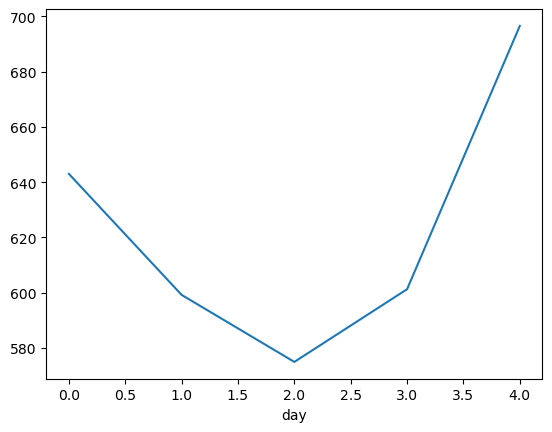

In [29]:
weekday_df.groupby('day')['Pedestrians'].mean().plot()

## 2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

In [25]:
year_df = df[ df['hour_beginning'].dt.year == 2019 ]

In [40]:
year_df.groupby(['weather_summary'])['Pedestrians'].mean().sort_values()

weather_summary
clear-night              33.233871
partly-cloudy-night      52.765922
sleet                   178.250000
fog                     212.409091
snow                    222.631579
rain                    229.822076
cloudy                  543.225041
wind                    679.000000
clear-day              1382.183298
partly-cloudy-day      1574.093627
Name: Pedestrians, dtype: float64

In [41]:
year_df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-02-10 12:00:00,Brooklyn Bridge,1388,623,765,clear-day,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6
8757,2019-11-10 08:00:00,Brooklyn Bridge,305,168,137,partly-cloudy-day,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6
8758,2019-11-07 01:00:00,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3
8759,2019-04-26 11:00:00,Brooklyn Bridge,1437,613,824,cloudy,55.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4


<Axes: >

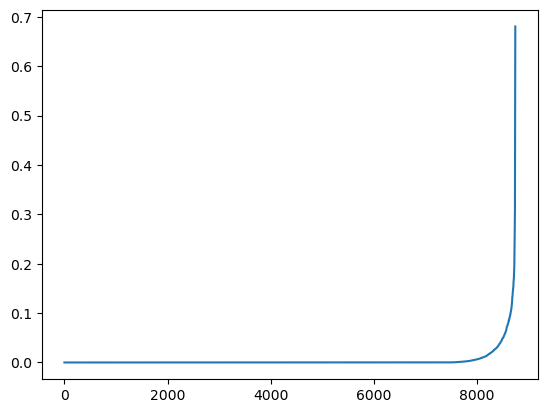

In [61]:
year_df['precipitation'].sort_values().reset_index(drop=True).plot()

In [57]:
year_df['temp_bin'] = pd.cut(year_df['temperature'], range(0, 110, 10))

/var/folders/xg/z1q6lgnx6h729nhfx42sngc80000gn/T/ipykernel_61651/285931503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['temp_bin'] = pd.cut(year_df['temperature'], range(0, 110, 10))


In [68]:
[.0, .1, .2, .3, .4, .5, .6, .7, .8]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [69]:
year_df['precip_bin'] = pd.cut(year_df['precipitation'], [.0, .1, .2, .3, .4, .5, .6, .7, .8])

/var/folders/xg/z1q6lgnx6h729nhfx42sngc80000gn/T/ipykernel_61651/4200925208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['precip_bin'] = pd.cut(year_df['precipitation'], [.0, .1, .2, .3, .4, .5, .6, .7, .8])


In [70]:
year_df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day,temp_bin,precip_bin
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,NaN,NaN
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,"(40.0, 50.0]","(0.0, 0.1]"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,"(40.0, 50.0]","(0.0, 0.1]"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,"(40.0, 50.0]","(0.0, 0.1]"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,"(30.0, 40.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-02-10 12:00:00,Brooklyn Bridge,1388,623,765,clear-day,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6,"(30.0, 40.0]",NaN
8757,2019-11-10 08:00:00,Brooklyn Bridge,305,168,137,partly-cloudy-day,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6,"(30.0, 40.0]",NaN
8758,2019-11-07 01:00:00,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,"(40.0, 50.0]",NaN
8759,2019-04-26 11:00:00,Brooklyn Bridge,1437,613,824,cloudy,55.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,"(50.0, 60.0]",NaN


In [78]:
heatmap_df = year_df.groupby(['temp_bin', "precip_bin"])['Pedestrians'].mean().unstack()

<Axes: xlabel='precip_bin', ylabel='temp_bin'>

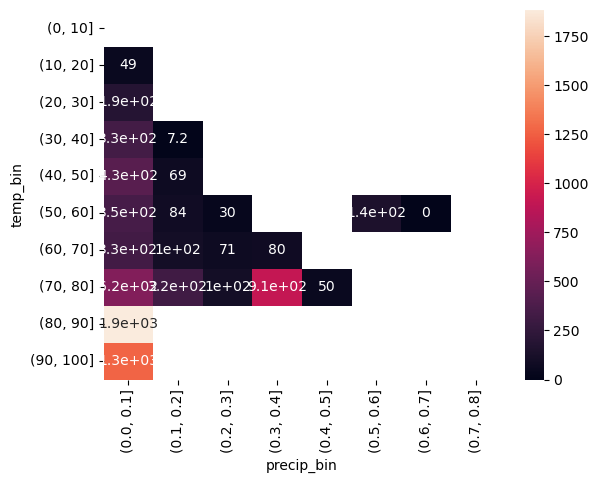

In [79]:
import seaborn as sns
sns.heatmap(heatmap_df, annot=True)

## 3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [81]:
df['hour_beginning'].dt.hour

0         0
1        22
2        23
3        21
4         3
         ..
16052     4
16053     6
16054    16
16055    18
16056     0
Name: hour_beginning, Length: 16057, dtype: int64

In [82]:
def get_time_of_day(hour):
    if hour < 11:
        return "morning"
    if hour < 15:
        return "afternoon"
    if hour < 19:
        return "evening"
    return 'night'

In [84]:
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(get_time_of_day)

In [89]:
df.groupby('time_of_day').mean(numeric_only=True).sort_values('Pedestrians')

,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,day
time_of_day,,,,,,,,
morning,206.461685,110.741848,95.719837,50.067674,0.004227,40.708164,-73.999509,2.994429
night,298.242451,147.670852,150.345889,53.516293,0.005350,40.708164,-73.999509,2.994021
evening,1519.866218,732.474215,787.392003,57.849776,0.005122,40.708164,-73.999509,2.994021
afternoon,1662.378550,787.115471,875.263079,56.834828,0.004267,40.708164,-73.999509,2.994021
